### Project 1

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

# 2. A detailed explanation of the attributes of the data.



    Include relevant summary statistics of the attributes.

In [5]:
# 1) Load datafile
path = r"C:\Users\mk\OneDrive\Med-tek\Kandidat\1. Semester\Machine Learning\Project1\Datasæt_Gallstone.xlsx"
df = pd.read_excel(path)

# 3) Features
feature_cols = ["Age", "Height", "Weight", "Vitamin D",
                "C-Reactive Protein (CRP)", "Total Body Fat Ratio (TBFR) (%)"]   # features


target_col = "Gallstone Status"   # target



X = df[feature_cols]
y = df[target_col]



# 3) Summary statistics for features (kun numeriske)
stats_df = pd.DataFrame({
    "mean":   X.mean(),
    "std":    X.std(ddof=1),
    "median": X.median(),
    "min":    X.min(),
    "max":    X.max()
})
print(stats_df.round(2))


# 4) Fordeling af køn
print("\n\n")
print(df["Gender"].value_counts())

# 5) Fordeling af target
print("\n\n")
print(y.value_counts())

                                   mean    std  median    min     max
Age                               48.07  12.11   49.00   20.0   96.00
Height                           167.16  10.05  168.00  145.0  191.00
Weight                            80.56  15.71   78.80   42.9  143.50
Vitamin D                         21.40   9.98   22.00    3.5   53.10
C-Reactive Protein (CRP)           1.85   4.99    0.22    0.0   43.40
Total Body Fat Ratio (TBFR) (%)   28.27   8.44   27.82    6.3   50.92



Gender
0    162
1    157
Name: count, dtype: int64



Gallstone Status
0    161
1    158
Name: count, dtype: int64


 # 3 Data Visualizations based on suitable visualization techniques


Gender x Gallstone status (grouped):
         No Gallstones  Gallstones
Female             94          68
Male               67          90


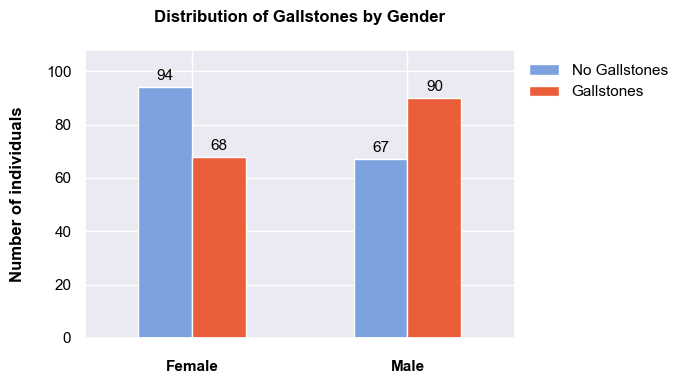

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load
path = r"C:\Users\mk\OneDrive\Med-tek\Kandidat\1. Semester\Machine Learning\Project1\Datasæt_Gallstone.xlsx"
df = pd.read_excel(path)

# 2) Safe conversion to numeric 0/1
g  = pd.to_numeric(df["Gender"], errors="coerce").astype("Int64")
gs = pd.to_numeric(df["Gallstone Status"], errors="coerce").astype("Int64")

# 3) Count the four combinations
female_no  = ((g == 0) & (gs == 0)).sum()
female_yes = ((g == 0) & (gs == 1)).sum()
male_no    = ((g == 1) & (gs == 0)).sum()
male_yes   = ((g == 1) & (gs == 1)).sum()

# 4) DataFrame grouped by gender
group_df = pd.DataFrame({
    "No Gallstones":  [female_no, male_no],
    "Gallstones":     [female_yes, male_yes]
}, index=["Female", "Male"]).astype(int)

print("\nGender x Gallstone status (grouped):\n", group_df)

# 5) Plot: two bars per gender
colors = ["#7CA2E0", "#EB5E3A"]
ax = group_df.plot(kind="bar", figsize=(7,4), color=colors)



# Titles and labels in black
ax.set_title("Distribution of Gallstones by Gender", pad=20, color="black", fontweight="bold")
ax.set_ylabel("Number of individuals", labelpad=15, color="black", fontweight="bold")
# ax.set_xlabel("Gender", labelpad=10, color="black")

# Tick labels in black
ax.tick_params(axis="x", colors="black", pad=10)
ax.tick_params(axis="y", colors="black")

# Legend in black
legend = ax.legend(title="", bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.setp(legend.get_texts(), color="black")       # legend labels
plt.setp(legend.get_title(), color="black")       # legend title

# X-ticks: Female/Male
ax.set_xticks(range(len(group_df.index)))
ax.set_xticklabels(group_df.index, rotation=0, ha="center", color="black", fontweight="bold")


# Extra space 
y_max = group_df.values.max()
ax.set_ylim(0, y_max * 1.15)   

# add value labels on top of bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=11, color="black",
                xytext=(0,3), textcoords="offset points")

plt.tight_layout()
plt.savefig(r"C:\Users\mk\OneDrive\Skrivebord\gallstones_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()



# Principal Component Analysis (PCA)

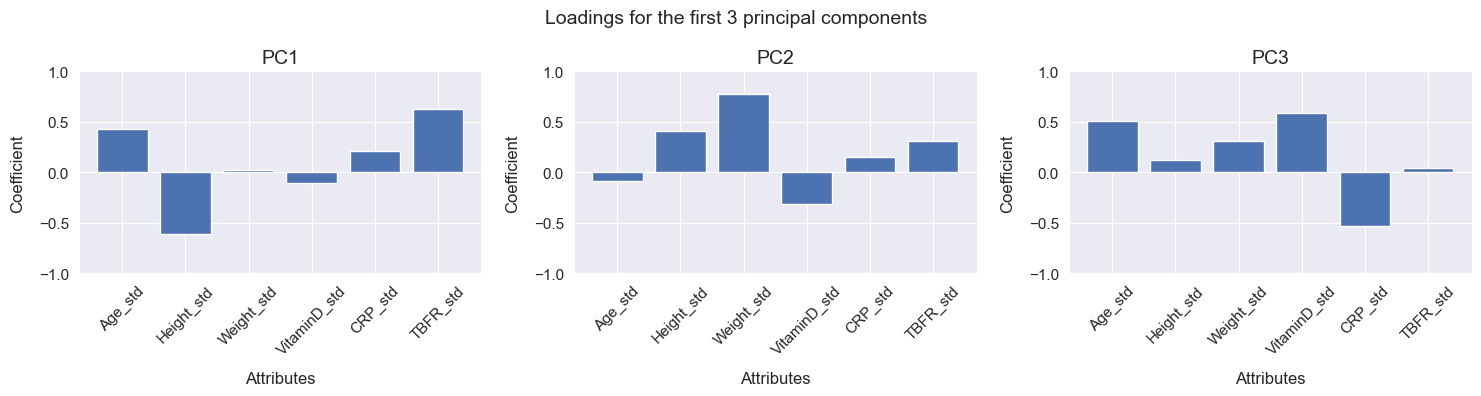

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Indlæs data ---
df = pd.read_excel(r"C:\Users\mk\OneDrive\Med-tek\Kandidat\1. Semester\Machine Learning\Project1\gallstone_standardized.xlsx")

# Vælg standardiserede kolonner ---
std_cols = [c for c in df.columns if c.endswith("_std")]
X = df[std_cols]

# PCA
pca = PCA(n_components=len(std_cols))
pca.fit(X)

# Loadings 
V = pca.components_.T   # loadings
attrs = std_cols        


sns.set_style("darkgrid")

K = 3
fig, axs = plt.subplots(1, K, figsize=(15,4))

for i in range(K):
    axs[i].bar(attrs, V[:, i], color=sns.color_palette("deep")[0])  
    axs[i].set_title(f"PC{i+1}", fontsize=14)
    axs[i].set_xlabel("Attributes", fontsize=12, labelpad=10)   
    axs[i].set_ylabel("Coefficient", fontsize=12, labelpad=10)  
    axs[i].set_ylim(-1, 1)
    axs[i].tick_params(axis='x', rotation=45, labelsize=11)
    axs[i].tick_params(axis='y', labelsize=11)

plt.suptitle("Loadings for the first 3 principal components", fontsize=14)
plt.tight_layout()
plt.show()


1–3 PC'er forklarer: 70.4%
Komponenter til ≥90%: 5


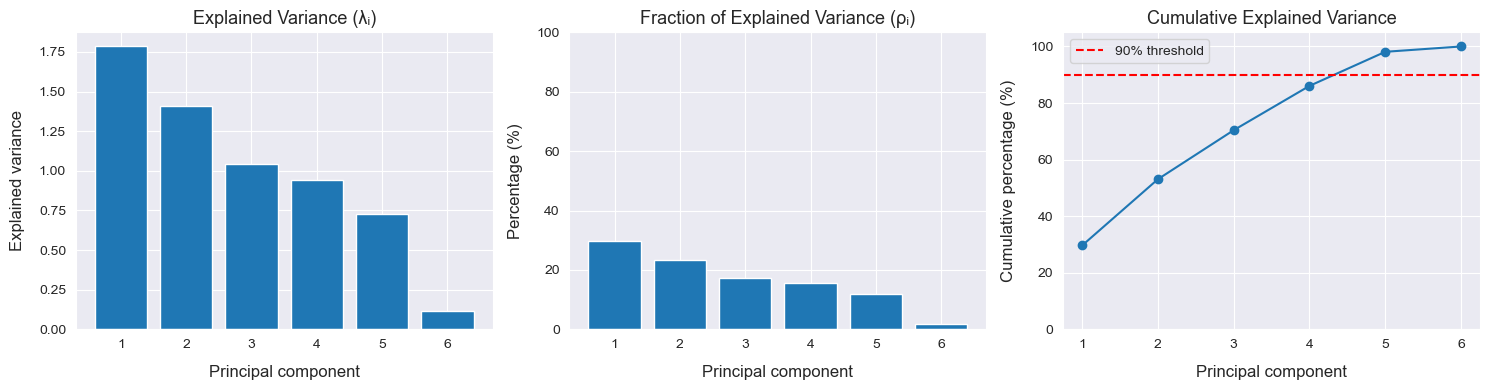

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Indlæs data ---
df = pd.read_excel(r"C:\Users\mk\OneDrive\Med-tek\Kandidat\1. Semester\Machine Learning\Project1\gallstone_standardized.xlsx")

# Vælg standardiserede kolonner
std_cols = [c for c in df.columns if c.endswith("_std")]
X = df[std_cols].values

#Standardisér og PCA 
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=X.shape[1], random_state=0).fit(X_std)

# Forkortelser
M = X.shape[1]
expl_var        = pca.explained_variance_              # λᵢ
expl_var_ratio  = pca.explained_variance_ratio_ * 100  # ρᵢ i procent
cum_expl_ratio  = np.cumsum(expl_var_ratio)            # summeret %

# Hvor mange PC'er til 90%
n90 = np.argmax(cum_expl_ratio >= 90) + 1
print(f"1–3 PC'er forklarer: {cum_expl_ratio[2]:.1f}%")
print(f"Komponenter til ≥90%: {n90}")

# Tre plots side om side
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# 1) Explained variance (absolut)
axs[0].bar(range(1, M+1), expl_var)
axs[0].set_title('Explained Variance (λᵢ)', fontsize=13)
axs[0].set_xlabel('Principal component', fontsize=12, labelpad=10)
axs[0].set_ylabel('Explained variance', fontsize=12, labelpad=10)
axs[0].set_xticks(range(1, M+1))

# 2) Fraction of explained variance (%)
axs[1].bar(range(1, M+1), expl_var_ratio)
axs[1].set_title('Fraction of Explained Variance (ρᵢ)', fontsize=13)
axs[1].set_xlabel('Principal component', fontsize=12, labelpad=10)
axs[1].set_ylabel('Percentage (%)', fontsize=12, labelpad=10)
axs[1].set_xticks(range(1, M+1))
axs[1].set_ylim(0, 100)

# 3) Accumulated fraction (%)
axs[2].plot(range(1, M+1), cum_expl_ratio, marker='o')
axs[2].axhline(90, color='red', linestyle='--', linewidth=1.5, label='90% threshold')
axs[2].set_title('Cumulative Explained Variance', fontsize=13)
axs[2].set_xlabel('Principal component', fontsize=12, labelpad=10)
axs[2].set_ylabel('Cumulative percentage (%)', fontsize=12, labelpad=10)
axs[2].set_xticks(range(1, M+1))
axs[2].set_ylim(0, 105)
axs[2].legend()

plt.tight_layout()
plt.show()


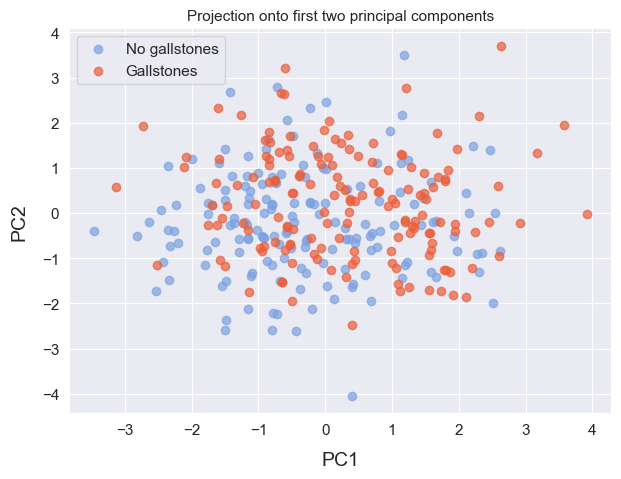

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Indlæs data
df = pd.read_excel(r"C:\Users\mk\OneDrive\Med-tek\Kandidat\1. Semester\Machine Learning\Project1\gallstone_standardized.xlsx")

# Vælg features (kun de standardiserede) og target 
std_cols = [c for c in df.columns if c.endswith("_std")]
X = df[std_cols].values
y = df["Gallstone Status"]  # target (0/1)

# Standardisering 
X_std = StandardScaler().fit_transform(X)

# PCA (kun de første 2 komponenter)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Farver 
colors = {0: "#7CA2E0", 1: "#EB5E3A"}
labels = {0: "No gallstones", 1: "Gallstones"}

# Scatter plot af PC1 vs PC2
plt.figure(figsize=(7,5))
for cls in [0,1]:
    plt.scatter(
        X_pca[y==cls, 0], X_pca[y==cls, 1],
        c=colors[cls], label=labels[cls], alpha=0.7
    )

plt.xlabel("PC1", fontsize=14, labelpad=10)
plt.ylabel("PC2", fontsize=14, labelpad=10)
plt.title("Projection onto first two principal components", fontsize=11)
plt.tick_params(axis='x', labelsize=11)
plt.tick_params(axis='y', labelsize=11)
plt.legend(fontsize=11)
plt.show()
